In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

c:\Users\user\Desktop\Data_Science\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
IMAGE_SIZE = 150
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 5

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print("Path to dataset files:", path)

c:\Users\user\Desktop\Data_Science\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 346M/346M [02:22<00:00, 2.54MB/s] 

Extracting files...


Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\puneet6060\intel-image-classification\versions\2


In [4]:
import os
os.listdir(path)

['seg_pred', 'seg_test', 'seg_train']

In [24]:
#val_path = os.path.join(path, 'seg_pred','seg_pred')# 7301
test_path = os.path.join(path,'seg_test','seg_test' )# 24335
train_path = os.path.join(path,'seg_train','seg_train')# 14034
test_path

'C:\\Users\\user\\.cache\\kagglehub\\datasets\\puneet6060\\intel-image-classification\\versions\\2\\seg_test\\seg_test'

In [22]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


In [25]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    shuffle=False,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 3000 files belonging to 6 classes.


In [27]:
class_names = train_ds.class_names
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [28]:
len(train_ds)

351

In [29]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch[0].shape)

(150, 150, 3)


In [30]:
print(image_batch.shape)

(32, 150, 150, 3)


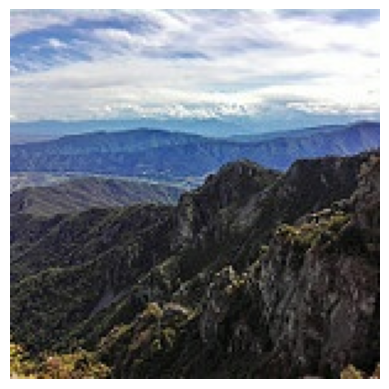

In [31]:
for image_batch, labels_batch in train_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

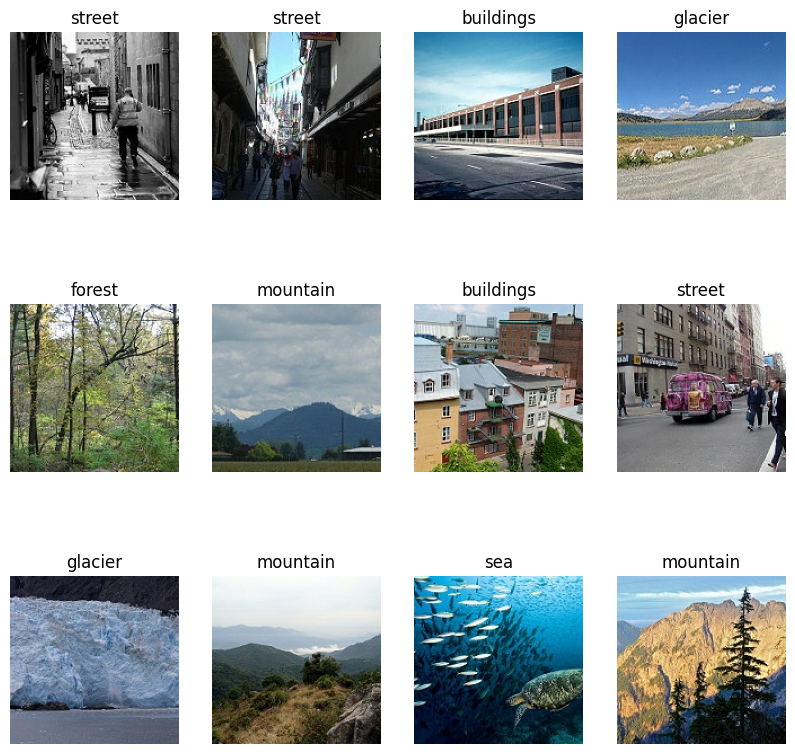

In [32]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [33]:
data_augmentation = tf.keras.Sequential([ 
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    
])

In [34]:
AUTOTUNE = tf.data.AUTOTUNE

In [35]:
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y),num_parallel_calls=AUTOTUNE)

In [42]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6
model = models.Sequential([
    #resize_and_rescale,  # This layer sets the input shape implicitly
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
# Build with only the image shape, no batch size
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

c:\Users\user\Desktop\Data_Science\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 294,406 (1.12 MB)

 Trainable params: 294,406 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [45]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
     min_delta=0.001)

In [46]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 673s 2s/step - accuracy: 0.4144 - loss: 1.8331 - val_accuracy: 0.4647 - val_loss: 1.3379
Epoch 2/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 452s 1s/step - accuracy: 0.5061 - loss: 1.2185 - val_accuracy: 0.4583 - val_loss: 1.4449
Epoch 3/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 587s 2s/step - accuracy: 0.5450 - loss: 1.1567 - val_accuracy: 0.5545 - val_loss: 1.1446
Epoch 4/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 550s 1s/step - accuracy: 0.5578 - loss: 1.1190 - val_accuracy: 0.4893 - val_loss: 1.3183
Epoch 5/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 396s 1s/step - accuracy: 0.5848 - loss: 1.0768 - val_accuracy: 0.5813 - val_loss: 1.1613
Epoch 6/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 346s 983ms/step - accuracy: 0.6114 - loss: 1.0369 - val_accuracy: 0.5403 - val_loss: 1.3338
Epoch 7/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 376s 964ms/step - accuracy: 0.6249 - loss: 1.0058 - val_accuracy: 0.6133 - val_loss: 1.0395
Epoch 8/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 326s 925ms/step - accuracy: 0.6302 - loss: 0.9813 -

In [ ]:
scores = model.evaluate(test_ds)


94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 444ms/step - accuracy: 0.7193 - loss: 0.8059


In [54]:
test_loss, test_accuracy = model.evaluate(test_ds)

print("Test Accuracy :", test_accuracy)
print("Test Loss     :", test_loss)


94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 227ms/step - accuracy: 0.7193 - loss: 0.8059
Test Accuracy : 0.7193333506584167
Test Loss     : 0.8058857321739197


In [ ]:
#  Get True labels & Predictions 

In [55]:
import numpy as np
import tensorflow as tf

y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
#  Precision, Recall, F1-Score (Per Class)

In [56]:
from sklearn.metrics import classification_report

class_names = test_ds.class_names

report = classification_report(
    y_true,
    y_pred,
    target_names=class_names
)

print(report)


              precision    recall  f1-score   support

   buildings       0.62      0.64      0.63       437
      forest       0.94      0.89      0.91       474
     glacier       0.66      0.76      0.71       553
    mountain       0.73      0.67      0.70       525
         sea       0.77      0.52      0.62       510
      street       0.67      0.83      0.74       501

    accuracy                           0.72      3000
   macro avg       0.73      0.72      0.72      3000
weighted avg       0.73      0.72      0.72      3000



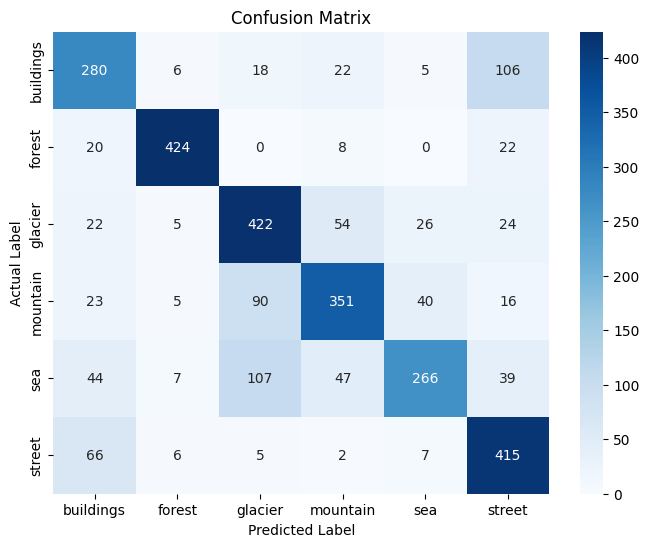

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()


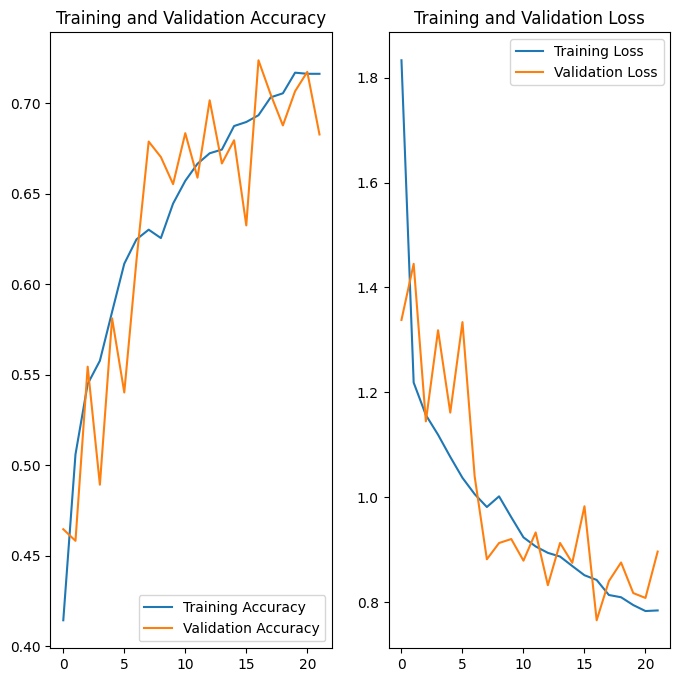

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))   # number of epochs actually trained

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


first image to predict
actual label: buildings
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
predicted label: buildings


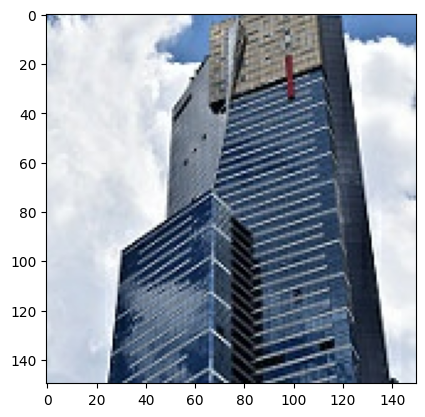

In [51]:
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])


In [53]:
class_names = test_ds.class_names
print(class_names)


['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


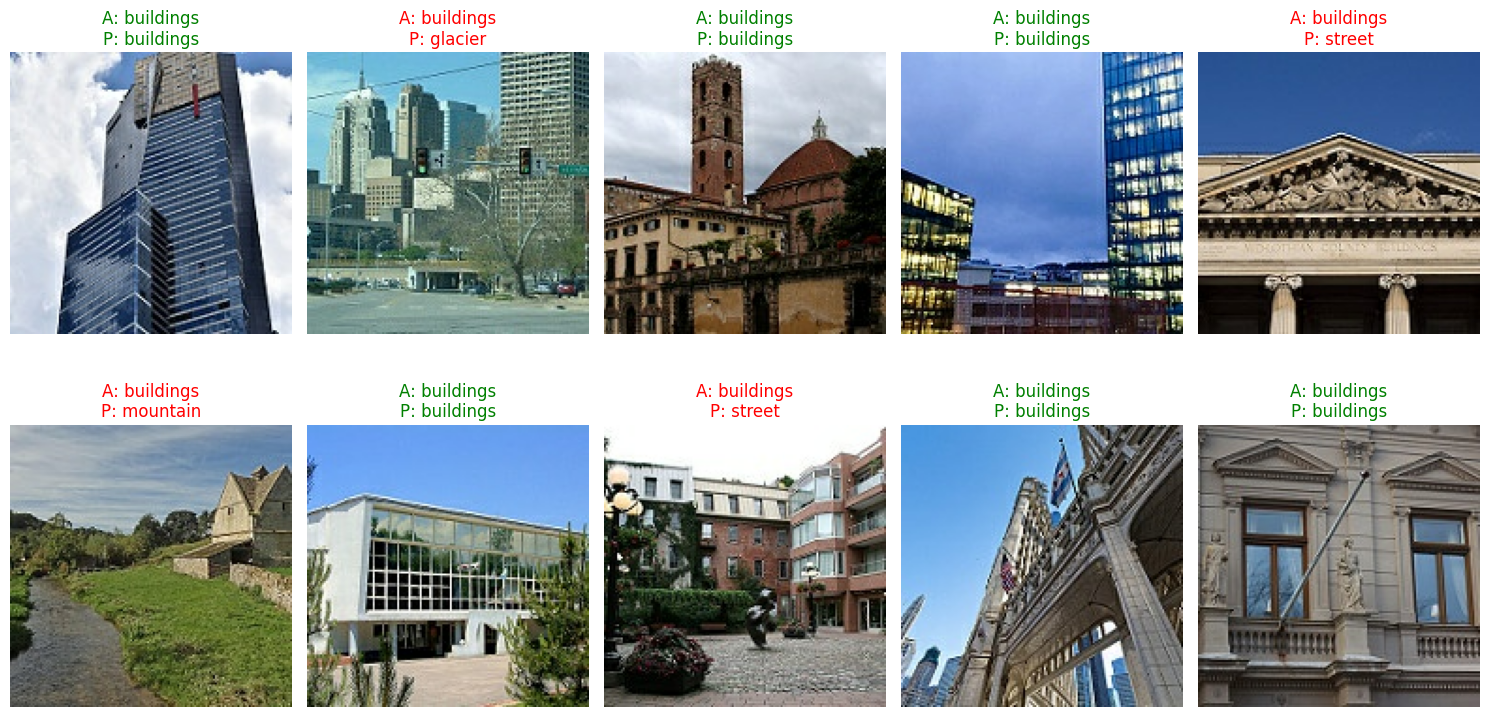

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

plt.figure(figsize=(15, 8))

# Take one batch from test dataset
for images, labels in test_ds.take(1):
    
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        actual = class_names[labels[i]]
        predicted = class_names[predicted_labels[i]]
        
        title_color = "green" if actual == predicted else "red"
        
        plt.title(f"A: {actual}\nP: {predicted}", color=title_color)
        plt.axis("off")

plt.tight_layout()
plt.show()
